# Some other features in Bayesian inference

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

Lazy Propagation uses a secondary structure called the "Junction Tree" to perform the inference.

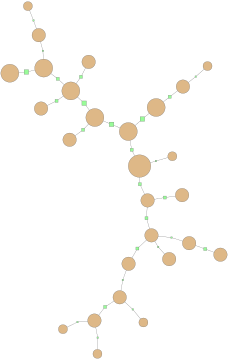

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

bn=gum.loadBN("res/alarm.dsl")
gnb.showJunctionTreeMap(bn);

But this junction tree can be transformed to build different probabilistic queries.

In [2]:
bn=gum.fastBN("A->B->C->D;A->E->D;F->B;C->H")
ie=gum.LazyPropagation(bn)
bn              

(pyAgrum.BayesNet<double>@0x5563922fd850) BN{nodes: 7, arcs: 7, domainSize: 128, dim: 16, mem: 256o}

## Evidence impact 
Evidence Impact allows the user to analyze the effect of any variables on any other variables

In [3]:
ie.evidenceImpact("B",["A","H"])

(pyAgrum.Potential<double>@0x556391219a00) 
             ||  B                |
H     |A     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.6858  | 0.3142  |
1     |0     || 0.5835  | 0.4165  |
0     |1     || 0.3822  | 0.6178  |
1     |1     || 0.2842  | 0.7158  |

Evidence impact is able to find the minimum set of variables which effectively conditions the analyzed variable

In [4]:
ie.evidenceImpact("E",["A","F","B","D"]) # {A,D,B} d-separates E and F

(pyAgrum.Potential<double>@0x5563918782f0) 
                    ||  E                |
D     |B     |A     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.9122  | 0.0878  |
1     |0     |0     || 0.9423  | 0.0577  |
0     |1     |0     || 0.9224  | 0.0776  |
1     |1     |0     || 0.9383  | 0.0617  |
0     |0     |1     || 0.4980  | 0.5020  |
1     |0     |1     || 0.6095  | 0.3905  |
0     |1     |1     || 0.5316  | 0.4684  |
1     |1     |1     || 0.5922  | 0.4078  |

In [5]:
ie.evidenceImpact("E",["A","B","C","D","F"]) # {A,C,D} d-separates E and {B,F}

(pyAgrum.Potential<double>@0x556391c5e8d0) 
                    ||  E                |
D     |A     |C     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.9243  | 0.0757  |
1     |0     |0     || 0.9363  | 0.0637  |
0     |1     |0     || 0.5384  | 0.4616  |
1     |1     |0     || 0.5838  | 0.4162  |
0     |0     |1     || 0.8915  | 0.1085  |
1     |0     |1     || 0.9442  | 0.0558  |
0     |1     |1     || 0.4397  | 0.5603  |
1     |1     |1     || 0.6179  | 0.3821  |

## Evidence Joint Impact

In [6]:
ie.evidenceJointImpact(["A","F"],["B","C","D","E","H"]) # {B,E} d-separates [A,F] and [C,D,H]

(pyAgrum.Potential<double>@0x556390db60d0) 
                    ||  A                |
F     |B     |E     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.0429  | 0.0126  |
1     |0     |0     || 0.8323  | 0.1122  |
0     |1     |0     || 0.1569  | 0.0418  |
1     |1     |0     || 0.5085  | 0.2928  |
0     |0     |1     || 0.0197  | 0.0605  |
1     |0     |1     || 0.3815  | 0.5383  |
0     |1     |1     || 0.0376  | 0.1051  |
1     |1     |1     || 0.1220  | 0.7353  |